# Python Learn by Doing: Climate Change Indicators

Developed By: Dr. Kerrie Geil, Mississippi State University

Date: January 2024

Requirements: list space, RAM, and pacakge requirements

Link: notebook available to download at 

<u> Description </u>

This notebook helps the learner build intermediate python programming skills through data query, manipulation, analysis, and visualization. Learning will be centered around obtaining climate data, computing climate change indices, and determining the statistical significance of change. The notebook is aimed at learners who already have some knowledge of programming and statistics. 

<u> Summary of Contents </u>

put an outline of tasks/skills here

-----

### Introduction to Climate Change Indicators

Put a description of what they are

Include a bunch of links

Spell out which ones we will be computing

Selection of ETCCDI Climate Extremes Indices
- Monthly Maximum Value of Daily Minimum Temperature (TNx)
- Growing Season Length (GSL)
- Warm Spell Duration Index (WSDI)
- Monthly Maximum Consecutive 5-day Precipitation (Rx5day)
- Maximum Length of Consecutive Dry Days (CDD)
- Annual Total Precip Amount Over 99th Percentile of Wet Days (R99pTOT)

**Disclaimer:** This notebook is intended for python programming learning only. The data quality checking and calculation of ETCCDI climate change indices in this notebook may differ slightly from the ETCCDI published instructions for simplicity and/or relevance to our learning goals. Learners wanting to compute the indices according to the exact ETCCDI instructions should consult their [documentation](https://etccdi.pacificclimate.org/index.shtml) or use the [RClimDex software package](https://github.com/ECCC-CDAS/RClimDex.git) written in R to calculate ETCCDI climate change indices. The indices calculated from multiple gridded datasets are available from [climdex.org](https://www.climdex.org/), which also offers a similar software package for calculating the indices on a dataset of your choice.   


For the climate change indices covered in this notebook we will need the following observational data over many data years:

variable abbrev. | description | frequency | units
---|---|---|---
tmin | minimum surface air temperature | daily | C 
tmax | maximum surface air temperature | daily | C
prcp | accummulated precipitation | daily | mm/day

### Importing Python Packages and Defining Your Workspace


In [1]:
# importing all the python packages we will need here

import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import os
import gzip
import shutil

import pandas as pd

In [2]:
# learners need to update these paths to reflect locations on their own computer/workspace

# path to your working directory (where this notebook is on your computer)
work_dir = r'C://Users/kerrie/Documents/01_LocalCode/repos/MSU_py_training/learn_by_doing/climate_change_indicators/' 
# work_dir = r'C://Users/kerrie.WIN/Documents/code/MSU_py_training/learn_by_doing/climate_change_indicators/' 

# path to where you'll download and store the data files
# data_dir = r'C://Users/kerrie.WIN/Documents/data/tutorials/learn_by_doing/climate_change_indicators/' 

# path to write output files and figures
output_dir = r'C://Users/kerrie/Documents/01_LocalCode/repos/MSU_py_training/learn_by_doing/climate_change_indicators/outputs/'
# output_dir = r'C://Users/kerrie.WIN/Documents/code/MSU_py_training/learn_by_doing/climate_change_indicators/outputs/'


# create directories if they don't exist already
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### Obtaining the Data

Describe the data requirements (importance of time dimension standardization and missing data) 

Warnings against performing climate change analyses on just any dataset (example PRISM)

Warnings about high resolution spatial data (much of it is interpolated, high res not always better)

Why we choose to use certain datasets

Links to each dataset's webpage

In [22]:
url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt'
filename = data_dir+'ghcnd-inventory.txt'

# urlretrieve(url, filename)

In [23]:
# load metadata file
colnames=['ID','LAT','LON','VAR','START','END']
df = pd.read_csv(filename,sep='\s+', names=colnames)
df

,ID,LAT,LON,VAR,START,END
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
746475,ZI000067983,-20.2000,32.6160,PRCP,1951,2023
746476,ZI000067983,-20.2000,32.6160,TAVG,1962,2023
746477,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
746478,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [24]:
# subset to United States Coop Network stations
df=df.loc[df['ID'].str.contains('USC')]
df

,ID,LAT,LON,VAR,START,END
407267,USC00010008,31.5703,-85.2483,PRCP,1948,2014
407268,USC00010008,31.5703,-85.2483,SNOW,1948,2010
407269,USC00010008,31.5703,-85.2483,SNWD,1948,2010
407270,USC00010008,31.5703,-85.2483,DAPR,1954,2007
407271,USC00010008,31.5703,-85.2483,DASF,1973,1973
...,...,...,...,...,...,...
687408,USC00914401,23.8667,-166.2833,SNOW,1958,1978
687409,USC00914401,23.8667,-166.2833,SNWD,1958,1978
687410,USC00914401,23.8667,-166.2833,DAPR,1960,1975
687411,USC00914401,23.8667,-166.2833,MDPR,1960,1975


In [25]:
# subset to variables we want
df =df[df.VAR.isin(['TMIN','TMAX','PRCP'])]
df

,ID,LAT,LON,VAR,START,END
407267,USC00010008,31.5703,-85.2483,PRCP,1948,2014
407280,USC00010063,34.2108,-87.1783,TMAX,2001,2023
407281,USC00010063,34.2108,-87.1783,TMIN,2001,2023
407283,USC00010063,34.2108,-87.1783,PRCP,1938,2023
407294,USC00010071,34.4167,-87.3167,PRCP,1949,1962
...,...,...,...,...,...,...
687393,USC00519955,21.8939,-159.5128,PRCP,1949,2023
687400,USC00519980,21.2983,-157.7853,PRCP,1949,2023
687405,USC00914401,23.8667,-166.2833,TMAX,1953,1978
687406,USC00914401,23.8667,-166.2833,TMIN,1953,1978


In [26]:
# subset to approx. Mississippi (rectangular bounding box)
df = df[(df.LON<-88.0978)&(df.LON>-91.6650)&(df.LAT>30.1739)&(df.LAT<34.9960)]
df

,ID,LAT,LON,VAR,START,END
407363,USC00010178,33.1272,-88.1550,TMAX,1934,2023
407364,USC00010178,33.1272,-88.1550,TMIN,1934,2023
407366,USC00010178,33.1272,-88.1550,PRCP,1934,2023
407377,USC00010184,33.2100,-88.2878,PRCP,1980,2023
407705,USC00010790,34.1667,-88.1167,PRCP,1948,1951
...,...,...,...,...,...,...
520168,USC00229850,32.8667,-90.4000,PRCP,1891,1959
520184,USC00229860,32.9028,-90.3817,TMAX,1960,2018
520185,USC00229860,32.9028,-90.3817,TMIN,1960,2018
520187,USC00229860,32.9028,-90.3817,PRCP,1960,2018


In [27]:
# subset to stations with many data years
df=df[(df.START<1920) & (df.END>2020)]
df

,ID,LAT,LON,VAR,START,END
419450,USC00031968,34.9772,-91.4978,TMAX,1903,2023
419451,USC00031968,34.9772,-91.4978,TMIN,1903,2023
419453,USC00031968,34.9772,-91.4978,PRCP,1903,2023
420250,USC00033242,34.5211,-90.5900,TMAX,1897,2023
420251,USC00033242,34.5211,-90.5900,TMIN,1897,2023
...,...,...,...,...,...,...
519993,USC00229400,34.1583,-89.6311,TMIN,1900,2023
519995,USC00229400,34.1583,-89.6311,PRCP,1893,2023
520021,USC00229439,31.6772,-88.6708,TMAX,1892,2023
520022,USC00229439,31.6772,-88.6708,TMIN,1892,2023


In [28]:
# subset to stations that have all three variables
df=df.groupby('ID').filter(lambda x: len(x)==3)
df

,ID,LAT,LON,VAR,START,END
419450,USC00031968,34.9772,-91.4978,TMAX,1903,2023
419451,USC00031968,34.9772,-91.4978,TMIN,1903,2023
419453,USC00031968,34.9772,-91.4978,PRCP,1903,2023
420250,USC00033242,34.5211,-90.5900,TMAX,1897,2023
420251,USC00033242,34.5211,-90.5900,TMIN,1897,2023
...,...,...,...,...,...,...
519993,USC00229400,34.1583,-89.6311,TMIN,1900,2023
519995,USC00229400,34.1583,-89.6311,PRCP,1893,2023
520021,USC00229439,31.6772,-88.6708,TMAX,1892,2023
520022,USC00229439,31.6772,-88.6708,TMIN,1892,2023


In [29]:
df_long=df[(df.END-df.START+1>=100)]
df_long

,ID,LAT,LON,VAR,START,END
419450,USC00031968,34.9772,-91.4978,TMAX,1903,2023
419451,USC00031968,34.9772,-91.4978,TMIN,1903,2023
419453,USC00031968,34.9772,-91.4978,PRCP,1903,2023
420250,USC00033242,34.5211,-90.5900,TMAX,1897,2023
420251,USC00033242,34.5211,-90.5900,TMIN,1897,2023
...,...,...,...,...,...,...
519993,USC00229400,34.1583,-89.6311,TMIN,1900,2023
519995,USC00229400,34.1583,-89.6311,PRCP,1893,2023
520021,USC00229439,31.6772,-88.6708,TMAX,1892,2023
520022,USC00229439,31.6772,-88.6708,TMIN,1892,2023


In [ ]:
df['NYEARS']=df.END-df.START+1
subTdf=df.loc[df.VAR=='TMAX']

In [ ]:
df_long=df[df.NYEARS>=100]
df_long=df_long.groupby('ID').filter(lambda x: len(x)==3)
df_long

In [ ]:
df_long=df_long[(df_long.END>=2020)&(df_long.START<=1920)]
df_long

In [ ]:
df_long.ID.unique()

In [ ]:
df_tx=df_long[df_long.VAR=='TMAX']

In [ ]:
# import matplotlib.pyplot as plt
df_tx=df[df.VAR=='TMAX']
plt.scatter(x=df_tx['LON'], y=df_tx['LAT'])
plt.show()

In [ ]:
df_tx.sort_values(['LON','LAT'],axis=0)

In [ ]:
# MSU is USC00228374
# Poplarville Exp Stn is USC00227128

In [11]:
for id in df.ID.unique():
    print('station id:',id)
    filename = id+'.csv.gz'
    url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_station/'+filename

    urlretrieve(url, data_dir+filename)

    with gzip.open(data_dir+filename, 'rb') as f_in:
        with open(data_dir+filename[:-3], 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

station id: USC00031968
station id: USC00033242
station id: USC00034638
station id: USC00035866
station id: USC00162151
station id: USC00168163
station id: USC00168923
station id: USC00220021
station id: USC00220792
station id: USC00220955
station id: USC00221094
station id: USC00221314
station id: USC00221389
station id: USC00221707
station id: USC00221738
station id: USC00221865
station id: USC00221962
station id: USC00222094
station id: USC00223887
station id: USC00223975
station id: USC00224939
station id: USC00226177
station id: USC00227128
station id: USC00227132
station id: USC00228374
station id: USC00229079
station id: USC00229400
station id: USC00229439


station id: USC00031968
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


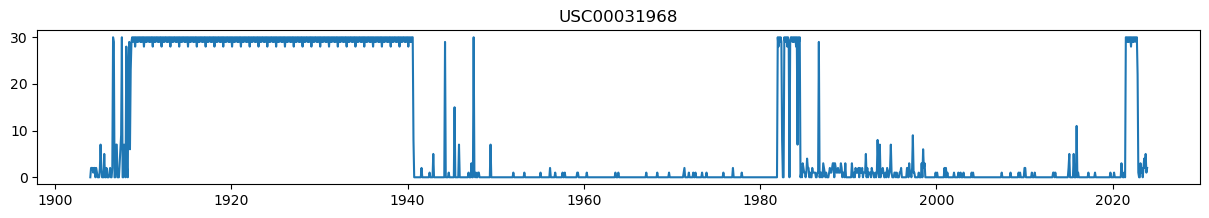

station id: USC00033242
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


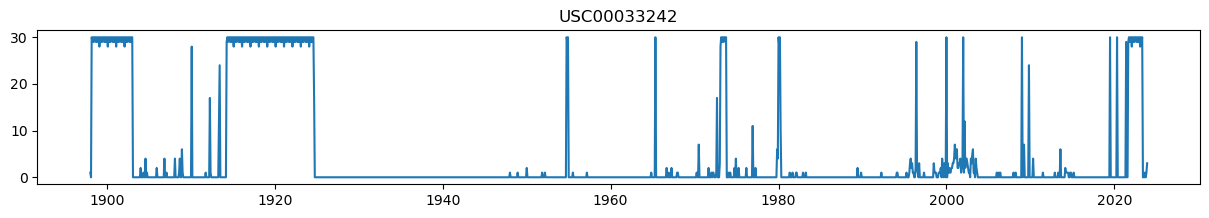

station id: USC00034638
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


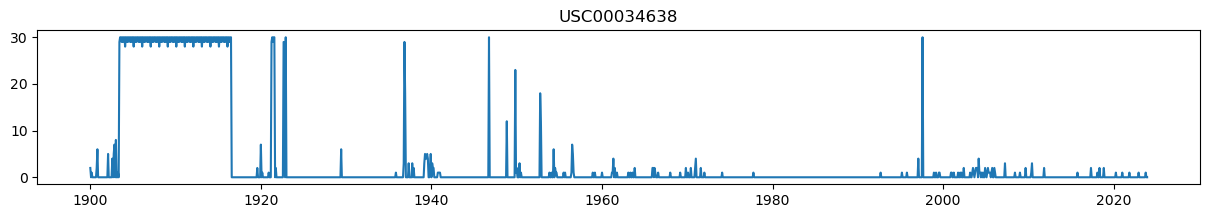

station id: USC00035866
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


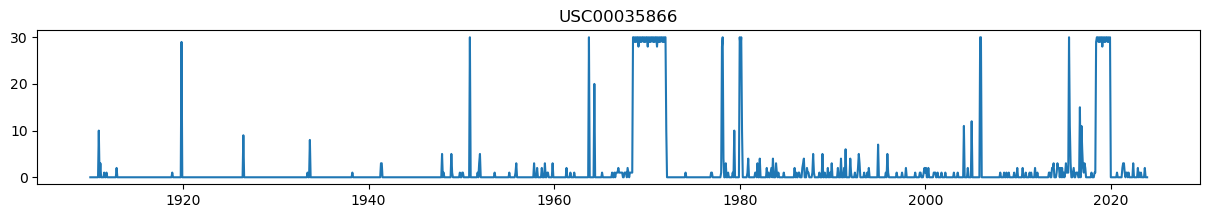

station id: USC00162151
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 2


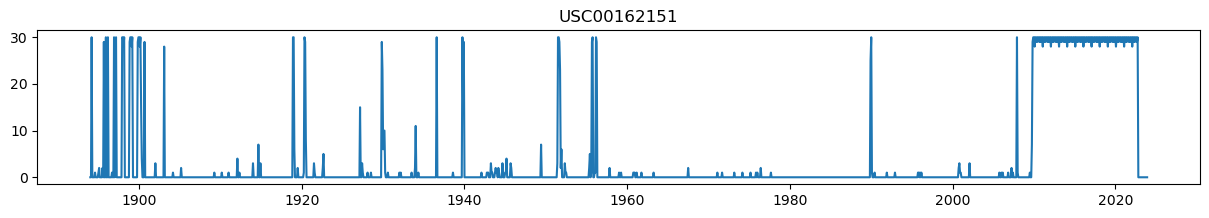

station id: USC00168163
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 2


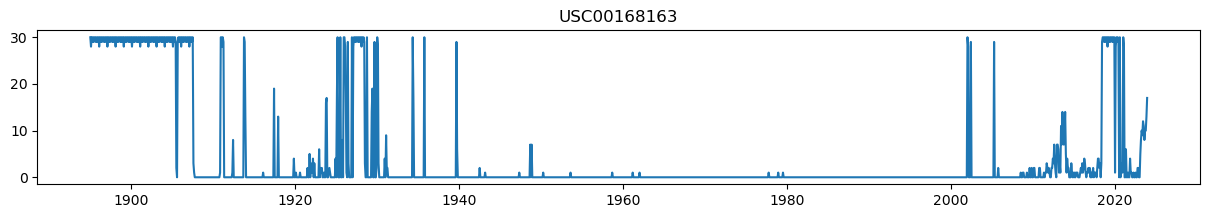

station id: USC00168923
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


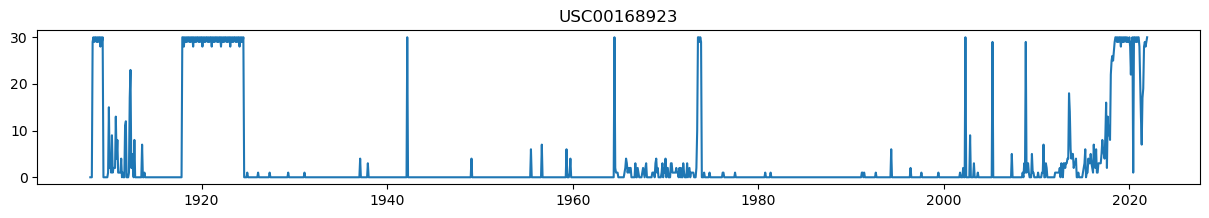

station id: USC00220021
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


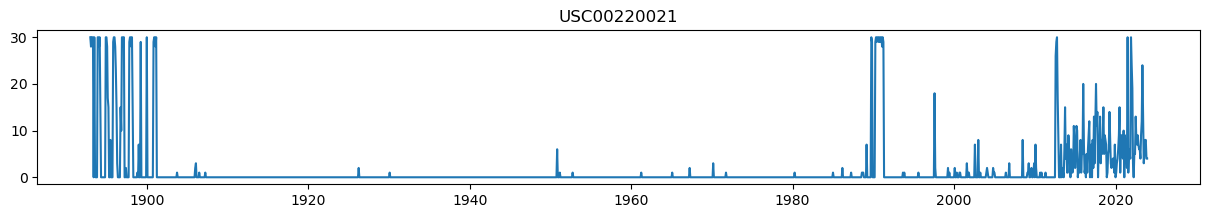

station id: USC00220792
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 4


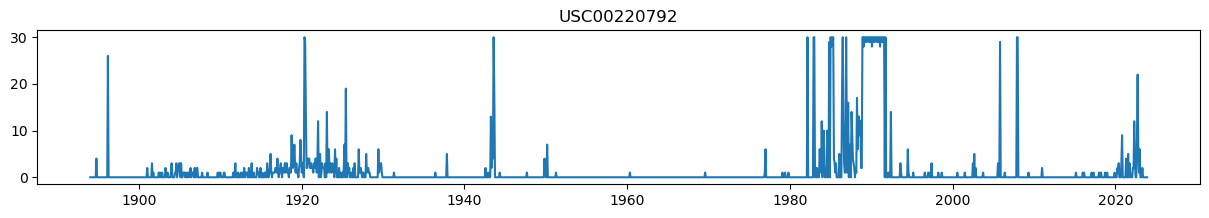

station id: USC00220955
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


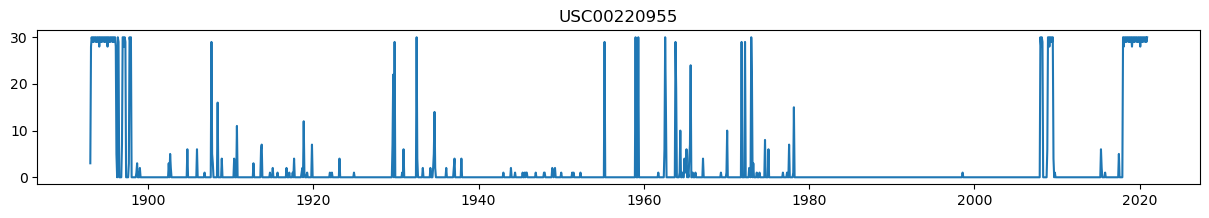

station id: USC00221094
number of -9999 values: 0
number of values>70: 1
number of values<-70: 0
number of outlier values: 8


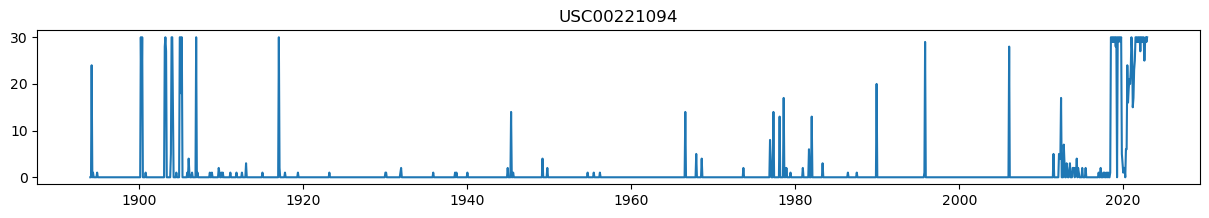

station id: USC00221314
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


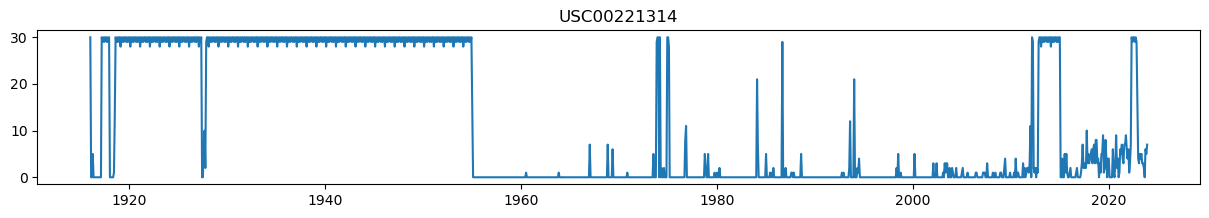

station id: USC00221389
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 2


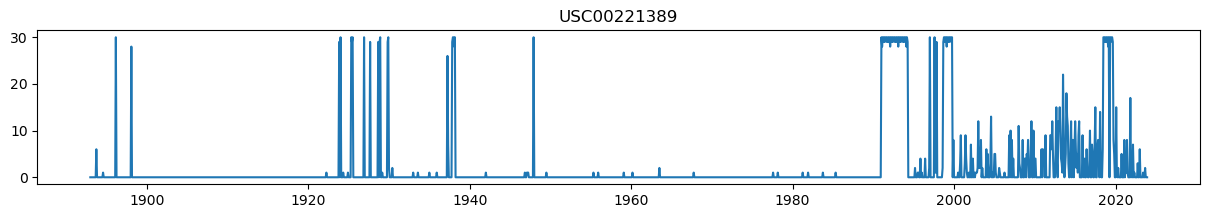

station id: USC00221707
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


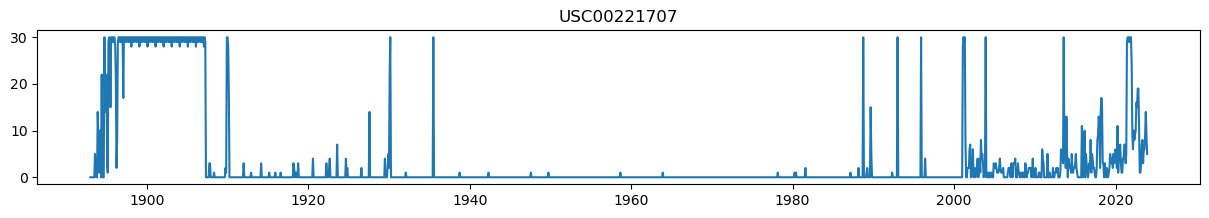

station id: USC00221738
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


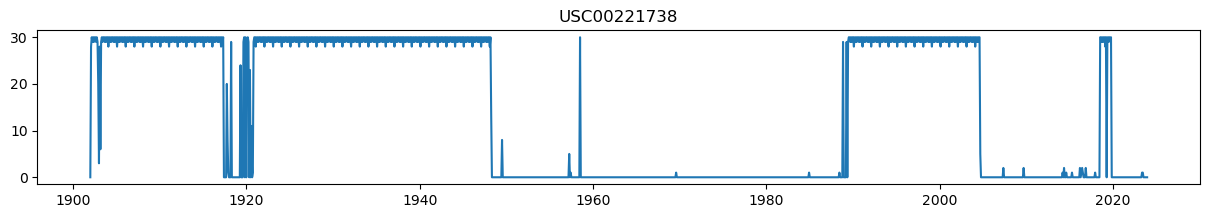

station id: USC00221865
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


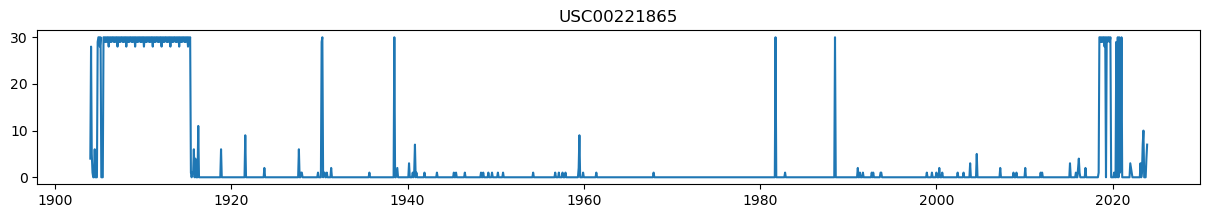

station id: USC00221962
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


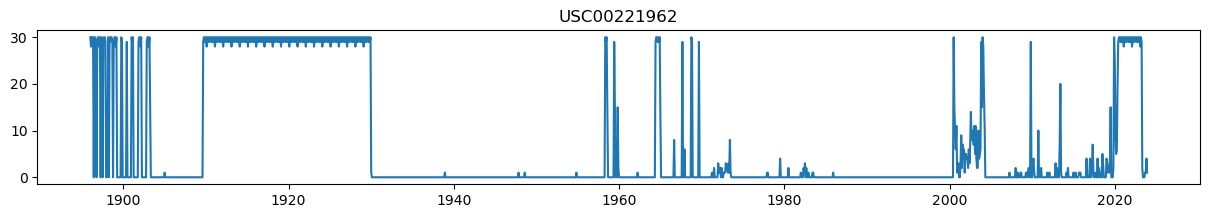

station id: USC00222094
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


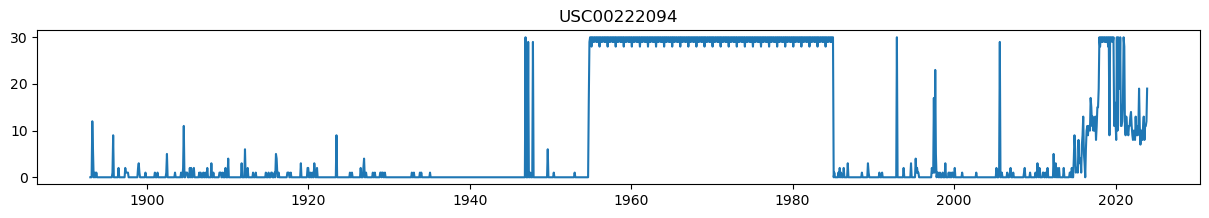

station id: USC00223887
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


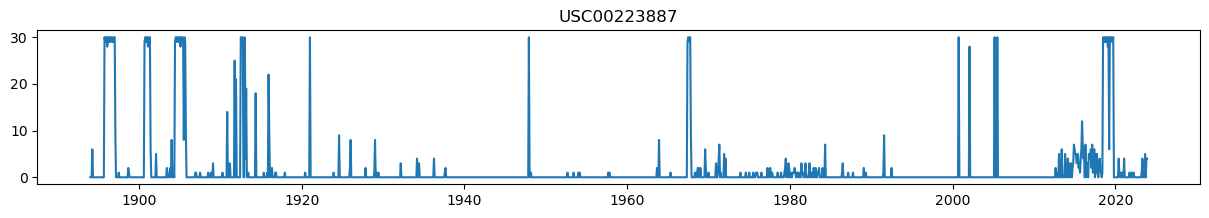

station id: USC00223975
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


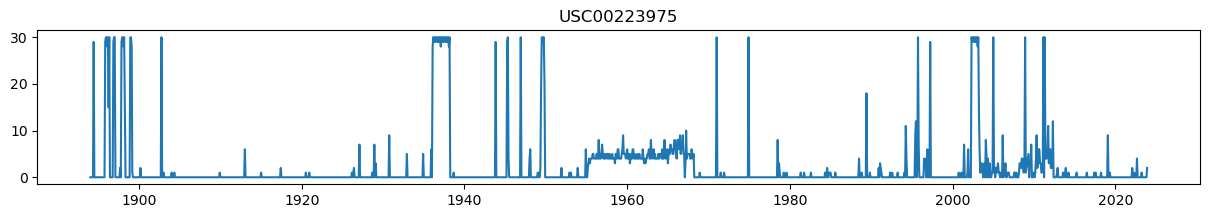

station id: USC00224939
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 3


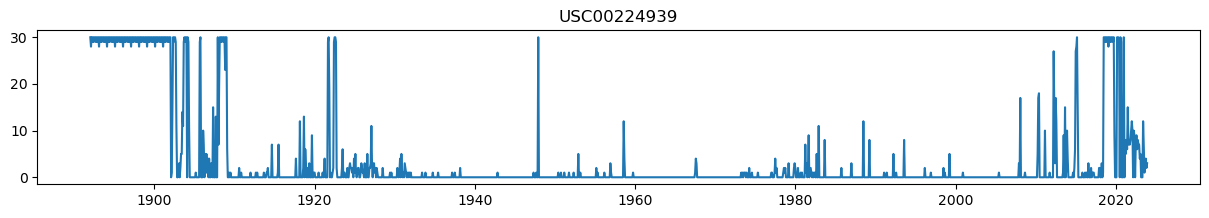

station id: USC00226177
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


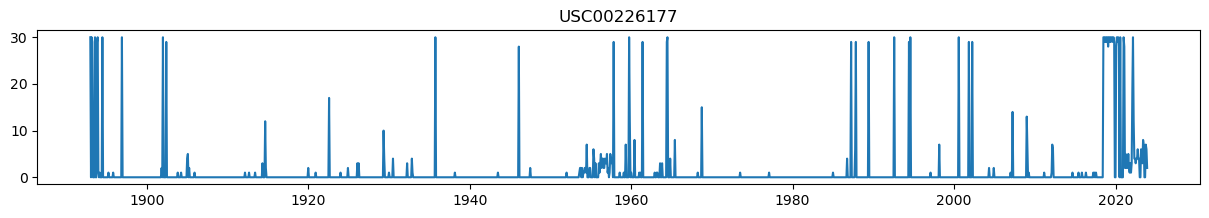

station id: USC00227128
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 7


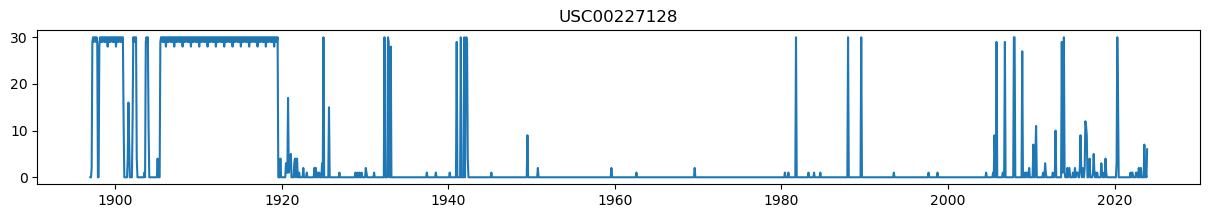

station id: USC00227132
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 2


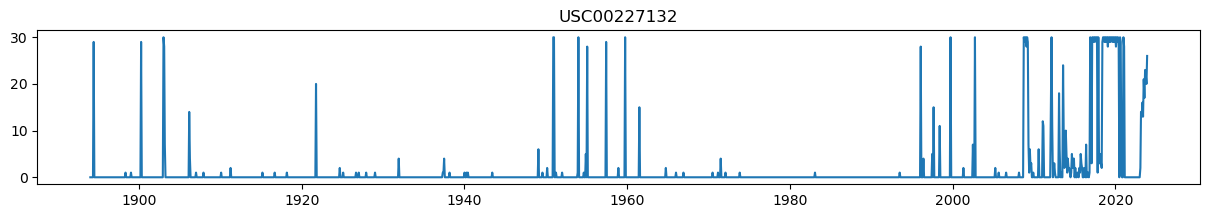

station id: USC00228374
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 4


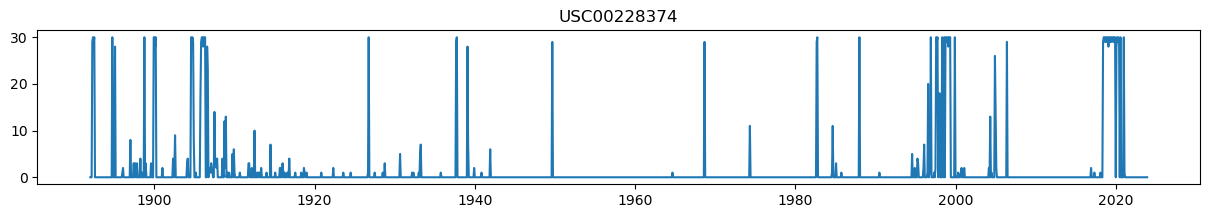

station id: USC00229079
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 2


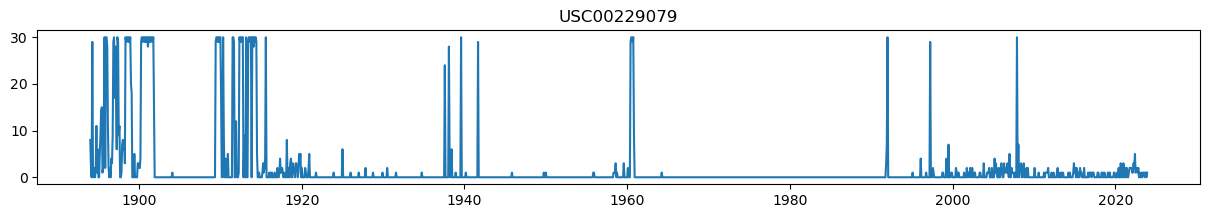

station id: USC00229400
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 1


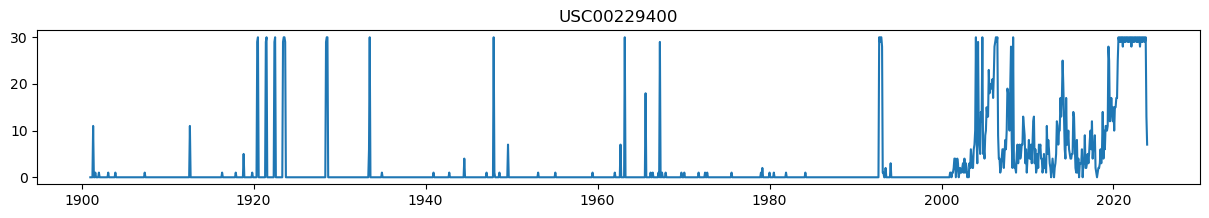

station id: USC00229439
number of -9999 values: 0
number of values>70: 0
number of values<-70: 0
number of outlier values: 0


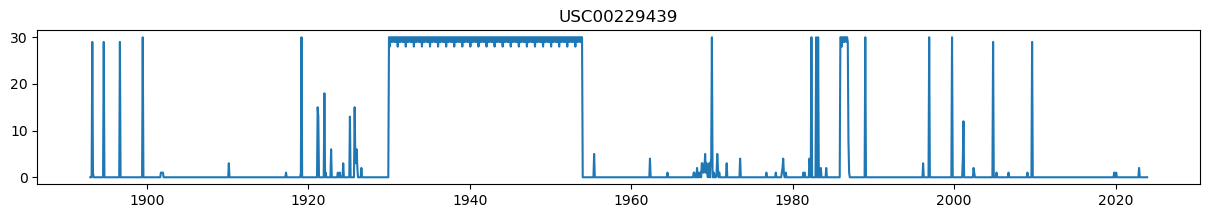

In [31]:
for id in df_long.ID.unique():
    print('station id:',id)

    # get data into a pandas dataframe
    filename = data_dir+id+'.csv'
    colnames=['ID','YYYYMMDD','ELEMENT','DATA_VALUE','M_FLAG','Q_FLAG','S_FLAG','OBS_TIME']
    data_types={'ID':'string','YYYYMMDD':'string','ELEMENT':'string','DATA_VALUE':'float','M_FLAG':'string','Q_FLAG':'string','S_FLAG':'string','OBS_TIME':'string'}
    na_values=[-9999]
    df = pd.read_csv(filename, names=colnames,dtype=data_types,na_values=na_values)

    # subset data
    df_tx=df[df.ELEMENT=='TMAX'].reset_index(drop=True)
    
    # create time index
    df_tx.index=pd.DatetimeIndex(df_tx.YYYYMMDD,name='time')

    # reindex to consecutive times, fill with nan for missing data
    date_start=str(int(df_tx.YYYYMMDD.iloc[0][0:4])+1)+'0101'
    date_end=str(int(df_tx.YYYYMMDD.iloc[-1][0:4])-1)+'1231'
    time=pd.Series(pd.date_range(date_start,date_end,name='time'))
    # print(date_start,date_end)
    # df_tx=df_tx[(df_tx.YYYYMMDD>=date_start)&(df_tx.YYYYMMDD<=date_end)]
    df_tx=df_tx.reindex(time)
    
    # convert units
    df_tx['DATA_VALUE']=df_tx['DATA_VALUE']/10.

    # convert object from pandas dataframe to xarray data array
    tx=df_tx['DATA_VALUE'].to_xarray().rename('tx')
    tx_attrs={'standard_name':'tmax','long_name':'maximum temperature','units':'degrees C','_FillValue':np.nan}
    tx.attrs=tx_attrs

    # drop leap days
    leapdays=time[time.dt.day==29]
    tx=tx.drop_sel(time=leapdays)

    # data cleaning
    print('number of -9999 values:',(tx==-9999).sum().data)
    print('number of values>70:',(tx>70).sum().data)
    print('number of values<-70:',(tx<-70).sum().data)

    tx_daily_mean=tx.groupby(tx.time.dt.dayofyear).mean()
    std_dev=tx.groupby(tx.time.dt.dayofyear).std()
    outlier_upper=(tx_daily_mean+std_dev*5)
    outlier_lower=(tx_daily_mean-std_dev*5)
    print('number of outlier values:',((tx.groupby(tx.time.dt.dayofyear)>outlier_upper)|(tx.groupby(tx.time.dt.dayofyear)<outlier_lower)).sum().data)

    # find how many days of missing data per month
    month_groups=pd.MultiIndex.from_arrays([tx.time['time.year'].data,tx.time['time.month'].data])
    tx.coords['month_groups']=('time',month_groups)
    nan_per_month=tx.isnull().groupby('month_groups').sum()

    time_months=pd.date_range(date_start,date_end,freq='MS')
    # print(time_months)
    # print(tx)

    fig=plt.figure(figsize=(15,2))
    plt.plot(time_months,nan_per_month)
    plt.title(id)
    plt.show()

describe any steps taken prior to here to decide on the station etc.

In [ ]:
# download/unzip temperature data

url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_station/USC00228374.csv.gz'
filename = data_dir+'USC00228374.csv.gz'
# urlretrieve(url, filename)

# with gzip.open(filename, 'rb') as f_in:
#     with open(filename[:-3], 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_station/readme-by_station.txt'
filename = data_dir+'readme-by_station.txt'
# urlretrieve(url, filename) 


url = 'ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt'
filename = data_dir+'readme.txt'
# urlretrieve(url, filename) 

In [ ]:
filename = data_dir+'USC00228374.csv'
colnames=['ID','YYYYMMDD','ELEMENT','DATA_VALUE','M_FLAG','Q_FLAG','S_FLAG','OBS_TIME']
data_types={'ID':'string','YYYYMMDD':'string','ELEMENT':'string','DATA_VALUE':'float','M_FLAG':'string','Q_FLAG':'string','S_FLAG':'string','OBS_TIME':'string'}
na_values=[-9999]
df = pd.read_csv(filename, names=colnames,dtype=data_types,na_values=na_values)
df

### Manipulate TMAX, TMIN, & PRCP into a useful format 

- 1D arrays
- data points for every day between start and end dates (consecutive daily timeseries)
- dimensional metadata attached (each data point is associated with metadata that includes the observation date)

In [ ]:
df_tx=df[df.ELEMENT=='TMAX'].reset_index(drop=True)
df_tn=df[df.ELEMENT=='TMIN'].reset_index(drop=True)
df_pr=df[df.ELEMENT=='PRCP'].reset_index(drop=True)

df_tn

In [ ]:
# what are the start/end dates for each variable?

df_tx.YYYYMMDD.iloc[0],df_tn.YYYYMMDD.iloc[0],df_pr.YYYYMMDD.iloc[0],df_tx.YYYYMMDD.iloc[-1],df_tn.YYYYMMDD.iloc[-1],df_pr.YYYYMMDD.iloc[-1]

# print(df_tx.DATA_VALUE.isna().sum()) # how many missing values are there? 


start date = 1891-09-01, end date = 2024-01-13

That's 122 days + 132 years (132*365 days + 32 leap days) + 13 days = 48,347 days 

If there was a data record for every day between the start and end dates each dataframe would have 48,347 rows (but they don't!)

We need to fill in the missing dates in order to create arrays with a time dimension in consecutive days.

In [ ]:
# create a datetime index of consecutive dates between the start and end dates, length should be 48,347 
date_start='1891-09-01'
date_end='2024-01-13'
time=pd.Series(pd.date_range(date_start,date_end,name='time'))#.to_frame(index=False, name='ALL_DATES')
time

In [ ]:
# replace the previous index of integer values with datetime values
df_tx.index=pd.DatetimeIndex(df_tx.YYYYMMDD,name='time')
df_tn.index=pd.DatetimeIndex(df_tn.YYYYMMDD,name='time')
df_pr.index=pd.DatetimeIndex(df_pr.YYYYMMDD,name='time')
df_tx

In [ ]:
# reindex the dataframe using the datetime Index of consecutive dates
# any dates that weren't present before will be added and the rows filled with Nan
df_tx=df_tx.reindex(time)
df_tn=df_tn.reindex(time)
df_pr=df_pr.reindex(time)

df_tn

In [ ]:
# do 1 data cleaning item before converting to array
# replace data value with nan anywhere there's a quality flag

print('tmax',df_tx.Q_FLAG.value_counts())   # how much of the data has quality flags?
print('tmin',df_tn.Q_FLAG.value_counts())   # how much of the data has quality flags?
print('prcp',df_pr.Q_FLAG.value_counts())   # how much of the data has quality flags?

print('----------------')

print('tmax nans',df_tx.DATA_VALUE.isna().sum()) # how many missing values are there? 
print('tmin nans',df_tn.DATA_VALUE.isna().sum()) # how many missing values are there? 
print('prcp nans',df_pr.DATA_VALUE.isna().sum()) # how many missing values are there? 

print('----------------')

df_tx.loc[~pd.isnull(df_tx.Q_FLAG),['DATA_VALUE']]=np.nan  # replace data value with nan anywhere there's a quality flag
df_tn.loc[~pd.isnull(df_tn.Q_FLAG),['DATA_VALUE']]=np.nan  # replace data value with nan anywhere there's a quality flag
df_pr.loc[~pd.isnull(df_pr.Q_FLAG),['DATA_VALUE']]=np.nan  # replace data value with nan anywhere there's a quality flag

print('tmax nans',df_tx.DATA_VALUE.isna().sum()) # how many missing values are there after applying the quality flags?
print('tmin nans',df_tn.DATA_VALUE.isna().sum()) # how many missing values are there after applying the quality flags?
print('prcp nans',df_pr.DATA_VALUE.isna().sum()) # how many missing values are there after applying the quality flags?

In [ ]:
# temperature is provided in tenths of degrees C
# precip is provided in tenths of mm
# change this to degrees C and mm

df_tx['DATA_VALUE']=df_tx['DATA_VALUE']/10.
df_tn['DATA_VALUE']=df_tn['DATA_VALUE']/10.
df_pr['DATA_VALUE']=df_pr['DATA_VALUE']/10.
df_tx


In [ ]:
tx=df_tx['DATA_VALUE'].to_xarray().rename('tx')
tn=df_tn['DATA_VALUE'].to_xarray().rename('tn')
pr=df_pr['DATA_VALUE'].to_xarray().rename('pr')
tx

In [ ]:
# add some additional metadata labels
tx_attrs={'standard_name':'tmax','long_name':'maximum temperature','units':'degrees C','_FillValue':np.nan}
tn_attrs={'standard_name':'tmin','long_name':'minimum temperature','units':'degrees C','_FillValue':np.nan}
pr_attrs={'standard_name':'pr','long_name':'precipitation','units':'mm/day','_FillValue':np.nan}

tx.attrs=tx_attrs
tn.attrs=tn_attrs
pr.attrs=pr_attrs

tx

In [ ]:
# download/unzip precipitation data

### Data Cleaning / Quality Control

The minimum quality control procedures suggested by ETCCDI are as follows.

Replace data value with Nan for:
- user-defined missing values (i.e -9999-->Nan)
- daily precip values less than 0
- daily max temperature less than daily minimum temperature
- daily temperature greater than 70C (158F) or less than -70C (-94F)
- leap days (i.e Feb 29th)
- impossible dates (i.e. 32nd March, 12th June 2042)
- non-numeric values
- daily temperature outliers (i.e. 3-5 times the standard deviation from the mean value for each calendar day)



In [ ]:
# replace user-defined missing values with nan

# we already did this when we read the data file (na_values=[-9999])
# verify that there aren't any -9999
# (df_tx.DATA_VALUE==-9999).sum(),(df_tn.DATA_VALUE==-9999).sum(),(df_pr.DATA_VALUE==-9999).sum()  
(tx==-9999).sum(),(tn==-9999).sum(),(pr==-9999).sum()  

In [ ]:
# replace negative precip values

# first see if there are any negatives
# (df_pr.DATA_VALUE<0).sum() 
(pr<0).sum() 

In [ ]:
# nan where daily tmax is less than daily tmin

# first see if there are any tmax<tmin
# (df_tx.DATA_VALUE < df_tn.DATA_VALUE).sum()
(tx<tn).sum()

In [ ]:
# nan where tmin or tmax <-70C or >+70C

# first we need to adjust the units to C
# df_tx['DATA_VALUE']=df_tx['DATA_VALUE']/10.
# df_tn['DATA_VALUE']=df_tn['DATA_VALUE']/10.

# tx=tx/10.
# tn=tn/10.

In [ ]:
# now test

# (df_tx.DATA_VALUE>70).sum(),(df_tx.DATA_VALUE<-70).sum(),(df_tn.DATA_VALUE>70).sum(),(df_tn.DATA_VALUE<-70).sum()
(tx>70).sum(),(tx<-70).sum(),(tn>70).sum(),(tn<-70).sum()

In [ ]:
# drop leap days

# df_tx=df_tx[~((df_tx.index.to_series().dt.month==2)&(df_tx.index.to_series().dt.day==29))]
# df_tn=df_tn[~((df_tn.index.to_series().dt.month==2)&(df_tn.index.to_series().dt.day==29))]
# df_pr=df_pr[~((df_pr.index.to_series().dt.month==2)&(df_pr.index.to_series().dt.day==29))]
# df_tx

# pandas series of all the leap days
leapdays=time[time.dt.day==29]

# drop the leap days from the xarray data array
tx=tx.drop_sel(time=leapdays)
tx

In [ ]:
# impossible dates

# we already indirectly tested for this when we created the DatetimeIndex from the DATES column
# if there had been impossible dates, there would have been an error thrown

In [ ]:
# non numeric values

# we already indirectly tested for this when we read in the data file with pd.read_csv
# since we set the data type for the DATA_VALUE column to 'float', a non-numeric value in that column would have thrown an error

In [ ]:
# daily temperature outliers

# find the time-mean temperature for each day of the year
tx_daily_mean=df_tx.groupby(df_tx.index.to_series().dt.day_of_year).mean('DATA_VALUE')

# find the standard deviation for each day of the yar
std_dev=df_tx['DATA_VALUE'].groupby(df_tx.index.to_series().dt.day_of_year).std()

# define daily outlier temperature as exceeding the mean +/- 3 times standard deviation
outlier_upper=(tx_daily_mean['DATA_VALUE']+std_dev*3).rename('OUTLIER')
outlier_lower=(tx_daily_mean['DATA_VALUE']-std_dev*3).rename('OUTLIER')
# outlier_upper

# how many outlier values are there?
# ((df_tx['DATA_VALUE'].groupby(df_tx.index.to_series().dt.day_of_year)>outlier_upper)|(df_tx['DATA_VALUE'].groupby(df_tx.index.to_series().dt.day_of_year)<outlier_lower)).sum()

In [ ]:
df_tx['DAY']=df_tx.index.to_series().dt.day

In [ ]:
df_tx.groupby(df_tx.index.to_series().dt.day_of_year)['DATA_VALUE'].get_group(1).index

In [ ]:
tx_daily_mean=tx.groupby(tx.time.dt.dayofyear).mean()

std_dev=tx.groupby(tx.time.dt.dayofyear).std()

outlier_upper=(tx_daily_mean+std_dev*5)
outlier_lower=(tx_daily_mean-std_dev*5)

# outlier_upper
# tx_daily_mean


In [ ]:
outlier_upper.min().data, outlier_upper.max().data, outlier_lower.min().data, outlier_lower.max().data

In [ ]:
# how many data points fall beyond the outlier limits?
((tx.groupby(tx.time.dt.dayofyear)>outlier_upper)|(tx.groupby(tx.time.dt.dayofyear)<outlier_lower)).sum().data

### subselect a range of years where there are no missing values in tmin, tmax, and pr

In [ ]:
tx.time['time.year']

In [ ]:
# month_groups=tx.time.stack(month=[tx.time.dt.year,tx.time.dt.month])
month_groups=pd.MultiIndex.from_arrays([tx.time['time.year'].data,tx.time['time.month'].data])
tx.coords['month_groups']=('time',month_groups)
nan_per_month=tx.isnull().groupby('month_groups').sum()

month_groups

In [ ]:
tx.coords['month_groups']=('time',month_groups)
tx

In [ ]:
# find all years that contain any nans
# nan_years=tx.isnull().groupby(['time.year','time.month']).sum()
# nan_years

nan_per_month=tx.isnull().groupby('month_groups').sum()
nan_per_month

In [ ]:
time_months=pd.date_range(date_start,date_end,freq='MS')
time_months

In [ ]:
time_months=pd.date_range(date_start,date_end,freq='MS')

fig=plt.figure(figsize=(15,3))
plt.plot(time_months,nan_per_month)

### Monthly Maximum Value of Daily Minimum Temperature (TNx)

- max(each month of daily minimum temperature values)

Here we are inputting daily data and pulling out 1 value per month.

### Growing Season Length (GSL)

- annually, growing season starts on the first day of the first six consecutive day period where daily mean temperature is > 5C
- annually, growing season ends on the first day after 1 July of the first six consecutive day period where daily mean temperature is < 5C

Here we are inputting daily data, pulling out 2 dates per year, and calculating the number of days between the two dates.


### Warm Spell Duration Index (WSDI)

- 6 consecutive days of hot temperatures
- hot temperature threshold defined as > 90th percentile temperature for each calendar day using a centered 5-day window in the base period 1961-1990
- warm spells that contain dates for multiple years are assigned to the year when the spell ends

Here we first use daily data during the base period to determine the daily 90th percentile temperature threshold. Then using all years of daily data we decide whether each calendar day exceeds the hot threshold, then find occurrences where the threshold is exceeded for at least 6 consecutive days (this is a warm spell), then sum the number of days annually in the warm spells.

Notice that this is not the same as finding dangerous heat waves with respect to human health because it is based on a temperature threshold for each calendar day. This means that the WSDI will include winter warm spells where the temperature exceeds the 90th percentile of winter daily temperature, which would likely be a comfortable temperature.

### Monthly Maximum Consecutive 5-day Precipitation (Rx5day)

- max(5-day rolling mean precipitation within each month)

Here we are inputting daily data, for each month calculating the mean precipitation amount for each 5-day window of data values, then choosing the maximum of 5-day window value for each month.


### Maximum Length of Consecutive Dry Days (CDD)

- annually, during the growing season (using mean start and mean end)
- maximum length of consecutive days where precipitation is < 1mm

Here we are inputting daily data, subsetting to data during the growing season, determining whether each day falls under the precipitation threshold, and finding the longest period of consecutive days each year that meets the threshold requirement. 


### Annual Total Precip Amount Over 99th Percentile on Wet Days (R99pTOT)

- annually, the sum of precipitation when precipitation is > 99th percentile of wet day precipitation in the base period 1961-1990
- where a wet day is precipitation >= 1mm

Here we first use daily data during the base period to determine the 99th percentile of wet day precipitation. Then for each year of daily data we determine if each day exceeds the threshold and calculate an annual sum of precip on days that exceed the threshold. 

### Are the Changes In Value of These Indices Over Time Statistically Significant?

### Computing Climate Change Indices on Gridded Data

In [ ]:
# download/unzip data

In [ ]:
# repeat one of the above analysis

In [ ]:
# visualize

# Your Turn!

### Choose one of three coding mini-projects below to complete on your own and prepare to share your findings


**Option 1 (easiest):** Calculate the monthly mean daily temperature range (DTR) at the xx station a create a figure showing the DTR timeseries. 

&emsp;Hints:
- Use daily tmax and tmin data
- Calculate the daily temperature range as tmax-tmin
- For each month, find the mean of the range values you calculated in the previous step
- Plot your timeseries of monthly values. Include axis labels and a title. 

<br>
<br>

**Option 2 (moderate):** Calculate the cold spell duration index (CDSI) at the xx station and create a figure showing the CDSI timeseries. Extra: see if you can determine whether the change in the CDSI is statistically significant.

&emsp;Hints:
- Use daily tmin data
- Find the daily 10th percentile temperature using a centered 5-day window over the base period 1961-1990
- Using all data years, determine if each day exceeds the threshold (looking for days with tmin < threshold)
- Identify cold spells as periods of 6 consecutive days when the temperature exceeds the threshold
- Count how many total cold spell days there are annually (remember each cold spell is assigned to the year when the spell ends)
- Plot the timeseries of annual values. Include axis labels and a title.
- Extra Step: Determine statistical significance of the trend line (linear regression) or the difference in means between two 30-year periods (1941-1970) and (1991-2020).

<br>
<br>


**Option 3 (hardest):** Use a gridded dataset to compute the annual growing season length (GSL) at each grid cell. Then, calculate the trend in GSL at each grid cell and also determine whether each trend is statisically significant. Present your results in a figure that shows the GSL trend for each grid cell (on a map) and include an indication of whether each grid cell value is statistically significant.

&emsp;Hints:
- Use gridded daily tmax and tmin data
- Calculate daily mean temperature
- Use the same process we showed previously to determine the annual start/end of the growing season and find the annual GSL, except this time do the calculations at each grid cell.
- Calculate the trend (linear regression) in annual GSL at each grid cell.
- Determine if each trend is statistically significant.
- Plot the the map of trend values and indicate significance at each grid with hatching or some other visual indicator. Include a title and legend.



In [ ]:
# peek at the answer figure for option 1

In [ ]:
# peek at the answer figure for option 2

In [ ]:
# peek at the answer figure for option 3

Don't forget to create answer codes for these and put them in the repo. Direct learners to answers after the work-on-your-own session.